### Agentic RAG

Agentic RAG (Retrieval-Augmented Generation) is an advanced form of RAG where the LLM acts as an autonomous agent — it can plan, decide, retrieve, verify, and refine information dynamically instead of just answering once.

⚙️ Agentic RAG — Step-by-Step Flow

START → agent
Agent decides whether to call tools (retriever).

agent → retrieve
If it decides to use tools → goes to retriever node.

retrieve → conditional → generate or rewrite
Based on relevance check via grade_documents().

generate → END
Produces final answer.

rewrite → agent
Rewrites query and loops again.

In [31]:
import os
from dotenv import load_dotenv
load_dotenv()
# Access keys
groq_api_key = os.getenv("GROQ_AI_API")
hf_api_key = os.getenv("HUGGINGFACE_API_KEY")

In [32]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter



### Our '1st vector store -LangGraph Blogs 

In [33]:
# Load documents from LangGraph documentation

langgraph_urls = [
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/concepts/low_level/",
    "https://langchain-ai.github.io/langgraph/concepts/tools/",
    "https://langchain-ai.github.io/langgraph/agents/agents/",
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/",
    "https://docs.langchain.com/oss/python/langgraph/overview"

]

docs = [WebBaseLoader(url).load() for url in langgraph_urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/low_level/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/tools/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/agents/agents/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language'

In [34]:
# Here, *docs* is a list of lists — each inner list is a group of documents.

doc_list = [item for sublist in docs for item in sublist]

# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=120)

doc_splits = text_splitter.split_documents(doc_list)

# Create embeddings
embeddings  = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)

retriever=vectorstore.as_retriever()

In [35]:
# demo query
query="What are the different types of agents in LangGraph?"
result = retriever.invoke(query)
result

[Document(id='3705195f-7e0f-46f0-977c-b55f0469d00d', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph Overview - Docs by LangChain', 'language': 'en'}, page_content='Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.\nWe will commonly use LangChain components throughout the documentation to integrate models and tools, but you don’t need to use LangChain to use LangGraph. If you are just getting start with agents or want a higher level abstraction, we recommend you use LangChain’s agents that provide pre-built architectures for common LLM and tool ca

In [36]:
# Convert retriever into a tool for Agentic RAG ---

from langchain.tools.retriever import create_retriever_tool
retriever_tool_langgraph = create_retriever_tool(
    retriever=retriever,
    name="retriever_vector_langgraph_blogs",
    description="Use this tool to search and retrieve information about LangGraph, RAG architectures, and agentic AI concepts."
)

print("✅ Retriever tool langgraph created successfully and ready for Agentic RAG use!")

✅ Retriever tool langgraph created successfully and ready for Agentic RAG use!


In [37]:
retriever_tool_langgraph

Tool(name='retriever_vector_langgraph_blogs', description='Use this tool to search and retrieve information about LangGraph, RAG architectures, and agentic AI concepts.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002DBA851B2E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002DBFC581810>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002DBA81E87C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002DBFC581810>, search_kwargs={}), document_prompt=PromptTemplate(input_variables

### Our '2nd vector store - Langchain Blogs

In [38]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engine

In [39]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [40]:
# langchain retriever tool creation

from langchain.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

print("✅ Retriever tool langchain created successfully and ready for Agentic RAG use!")

✅ Retriever tool langchain created successfully and ready for Agentic RAG use!


In [41]:
tools = [retriever_tool_langgraph,retriever_tool_langchain]

### LangGraph Workflow ->

In [42]:
from typing import Annotated,Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], "The conversation history between the user and the agent."]

In [43]:
# Create LLM
llm = ChatGroq(temperature=0, model="llama-3.3-70b-versatile", api_key=groq_api_key)

In [44]:
# defining agent function 


def agent(state):
    print("🧠 Invoking agent model...")
    messages = state["messages"]
    model_with_tools = llm.bind_tools(tools)
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

note******

- We're defining a generate function that checks whether the retrieved documents are relevant to the question or not.

- futher it will let the agent decide whether to generate the final response taking the workflow to the end OR rewrite the whole query to produce a better question sending it again to the retriever for better response.

In [45]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field
from langchain.schema import Document


# defining document grading function

def grade_documents(state: AgentState) -> Literal["generate", "rewrite"]:
    """
    Determines whether retrieved documents are relevant.
    """
    print("---CHECK RELEVANCE---")
    
    class Grade(BaseModel):
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    model = ChatGroq(model="llama-3.3-70b-versatile", api_key=groq_api_key)
    llm_with_tool = model.with_structured_output(Grade)

    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of retrieved documents to a question.
        Here is the document: {context}
        Here is the user question: {question}
        Provide a binary score 'yes' or 'no'.""",
        input_variables=["context", "question"],
    )
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content

    # Normalize docs to list of Document objects
    if isinstance(docs, str):
        docs = [Document(page_content=docs)]
    elif isinstance(docs, list) and len(docs) > 0 and isinstance(docs[0], str):
        docs = [Document(page_content=d) for d in docs]

    if not docs:
        print("⚠️ No documents retrieved, forcing rewrite.")
        return "rewrite"

    # Debug print
    print("🔎 Retrieved docs sample:")
    print(docs[0].page_content[:1000] if docs else "⚠️ No documents retrieved.")

    # Concatenate all docs for context
    context_text = "\n\n".join(doc.page_content for doc in docs)
    scored_result = chain.invoke({"question": question, "context": context_text})
    score = scored_result.binary_score.strip().lower()

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewrite"

### now defining functionalities for  'generate' & 'rewrite' seperately

In [46]:
# defining answer generation function
def generate(state: AgentState) -> dict:
    """
    Generate answer from retrieved documents.
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content

    # Normalize docs
    if isinstance(docs, str):
        docs = [Document(page_content=docs)]
    elif isinstance(docs, list) and len(docs) > 0 and isinstance(docs[0], str):
        docs = [Document(page_content=d) for d in docs]

    if not docs:
        return {"messages": [AIMessage(content="No documents retrieved to generate an answer.")]}

    prompt = hub.pull("rlm/rag-prompt")
    llm_local = ChatGroq(model="llama-3.3-70b-versatile", api_key=groq_api_key)
    rag_chain = prompt | llm_local | StrOutputParser()

    context_text = "\n\n".join(doc.page_content for doc in docs)
    response = rag_chain.invoke({"context": context_text, "question": question})
    return {"messages": [response]}

In [47]:
# defining query rewriting function
def rewrite(state: AgentState) -> dict:
    """
    Transform query for better retrieval.
    """
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [HumanMessage(content=f"""
Look at the input and reason about semantic intent.
Initial question: {question}
Formulate an improved question:""")]

    model = ChatGroq(model="llama-3.3-70b-versatile", api_key=groq_api_key)
    response = model.invoke(msg)
    return {"messages": [response]}

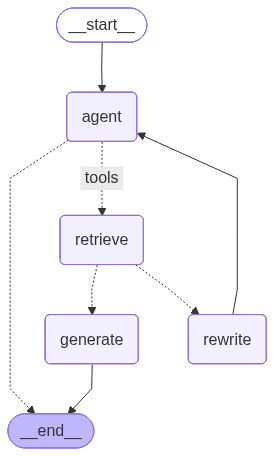

In [48]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Create the workflow graph
workflow = StateGraph(AgentState)

# Agent node
workflow.add_node("agent", agent)

# Retrieval node using ToolNode
retrieve = ToolNode(tools)
workflow.add_node("retrieve", retrieve)

# Rewrite node
workflow.add_node("rewrite", rewrite)

# Generate node
workflow.add_node("generate", generate)

# ---------------- Edges ----------------
# Start -> Agent
workflow.add_edge(START, "agent")

# Agent decision -> either retrieve or end
workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools": "retrieve",
        END: END,
    },
)

# Retrieval decision -> grade documents
workflow.add_conditional_edges("retrieve", grade_documents, {
    "generate": "generate",
    "rewrite": "rewrite"
})

# Generate -> End
workflow.add_edge("generate", END)

# Rewrite -> Agent (so query gets improved and retried)
workflow.add_edge("rewrite", "agent")

# ---------------- Compile ----------------
graph = workflow.compile()

# Optional: visualize graph
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [49]:
# test the graph with a query -  Test 1
from langchain_core.messages import HumanMessage

response = graph.invoke({
    "messages": [HumanMessage(content="messages: What is Langgraph?")]
})

print(response)


🧠 Invoking agent model...
---CHECK RELEVANCE---
🔎 Retrieved docs sample:
LangGraph Overview - Docs by LangChainSkip to main contentLangGraph Platform is now part of LangSmith. Check out the Changelog for more information.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph OverviewLangChainLangGraphIntegrationsLearnReferenceContributingPythonOverviewGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelAdd and manage memorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph OverviewCopy pageCopy pageAlpha Notice: These docs cover the v1-alpha release. Content is incomplete and subject to change.For the latest stable version, see the current LangGraph Python or LangGraph JavaScr

c:\Users\Akarshan Kapoor\Documents\Data Science\Langchain Projects\RAG ext\.venv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


{'messages': ['LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents. It provides low-level supporting infrastructure and does not abstract prompts or architecture, focusing on capabilities like durable execution, streaming, and human-in-the-loop. A simple "hello world" example is provided in the documentation, demonstrating how to create a basic agent using LangGraph.']}


In [52]:
# test the graph with a query -  Test 1
from langchain_core.messages import HumanMessage

response = graph.invoke({
    "messages": [HumanMessage(content="messages: What is machine learning?")]
})

print(response)

🧠 Invoking agent model...
---CHECK RELEVANCE---
🔎 Retrieved docs sample:
a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights 

c:\Users\Akarshan Kapoor\Documents\Data Science\Langchain Projects\RAG ext\.venv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


{'messages': ['Task decomposition can be done in three ways: (1) by LLM with simple prompting, (2) by using task-specific instructions, or (3) with human inputs. This process involves breaking down complex tasks into smaller, more manageable steps. Chain of thought (CoT) is a standard prompting technique that enhances model performance on complex tasks by instructing the model to "think step by step".']}
